# 03 Specialized Visualization 

- Pie Charts
- Box Plots
- Scatter Plots
- Bubble Plots

# Downloading and Preparing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

## Clean up data
>make modifications to the original dataset to create the visualizations.

### 1. Remove columns
>Clean up the dataset to remove columns that are not informative to us for visualization (Type, AREA, REG. DEV, Coverage)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.shape

(195, 38)

### 2. Rename columns 

In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### 3. Convert column labels type to string

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
all(isinstance(column, str) for column in df_can.columns)

True

### 4. Set country name as index
>for quickly looking up countries using .loc method.

In [10]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


### 5. Add total column

In [11]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
print (f'data dimensions: {df_can.shape}')

data dimensions: (195, 38)


### 6. Create a list of years from 1980 - 2013
> used for plotting the data

In [13]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

# Pie Charts

>circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib.pyplot as plt

## Explore new immigrants percentage by continents 1980 - 2013.
>explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

### Step 1: Gather data. 

Use *pandas* `groupby` method to summarize the immigration data by `Continent`. 

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

![](../images/split_apply_combine.png)

In [15]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


### Step 2: Plot the data

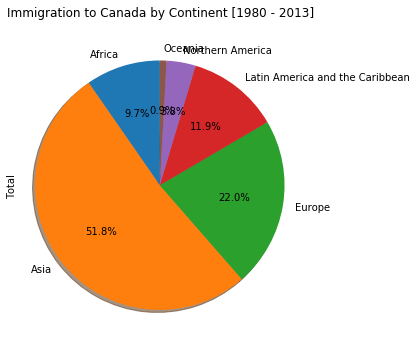

In [16]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Make  modifications to improve the visuals

- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
- Pass in a custom set of colors for continents by passing in colors parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

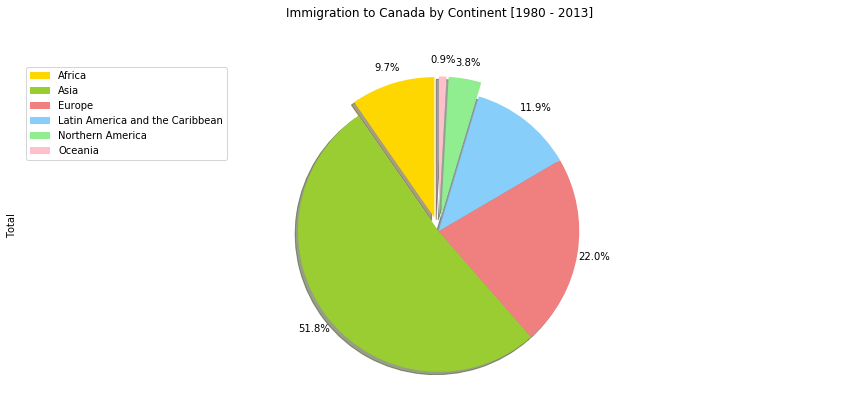

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Explore new immigrants percentage by continents in 2013
>explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [18]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents_2013 = df_continents['2013']
df_continents_2013

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

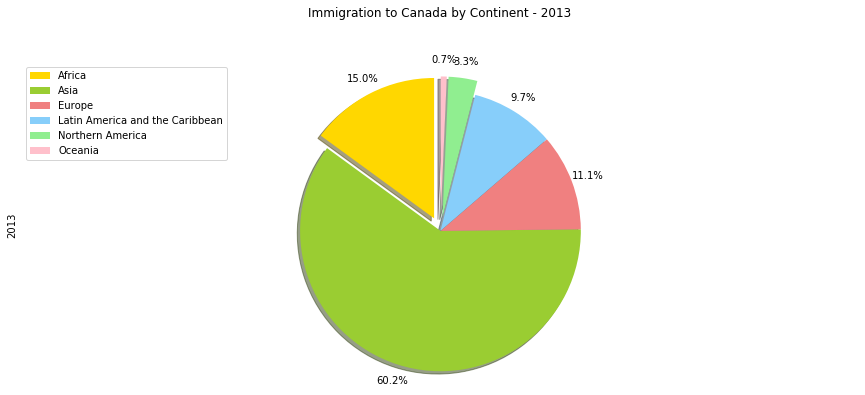

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents_2013.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent - 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plots

>way of statistically representing the distribution of the data through five main dimensions:

- **Minimun**: Smallest number in the dataset.
- **First quartile**: Middle number between the minimum and the median.
- **Second quartile (Median)**: Middle number of the (sorted) dataset.
- **Third quartile**: Middle number between median and maximum.
- **Maximum**: Highest number in the dataset.

![](../images/boxplot_dimensions.png)

## Japanese immigrants box plot
>plot the box plot for the Japanese immigrants between 1980 - 2013

### Step 1: Get the dataset
>extracting the data for just one country
>call the dataframe.describe() method to view the percentiles.

In [20]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


### Step 2: Plot by passing in kind='box'

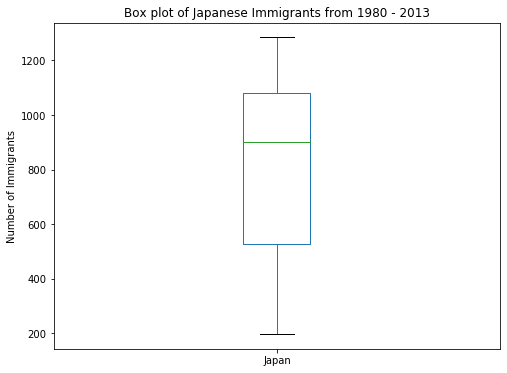

In [21]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

>Make a few key observations from the plot above:
- The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
- 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
- 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [22]:
# view the actual numbers by calling the describe() method on the dataframe.
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


## Compare new immigrants from India and China 
>Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

### Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [23]:
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


### Step 2: Plot data

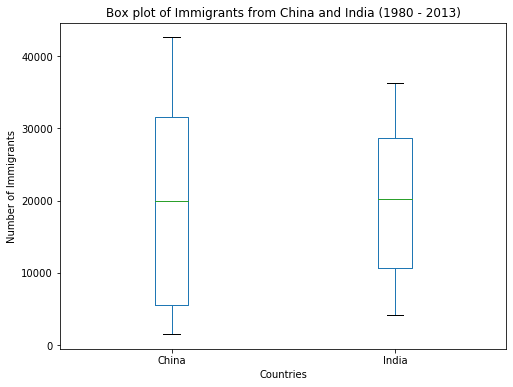

In [24]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Countries')

plt.show()

>Both countries have around the same median immigrant population (~20,000)

>China's immigrant population range is more spread out than India's. 

>The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

### Create horizontal box plots
> pass the vert parameter in the plot function and 
assign it to False. 
- specify a different color instead of the default red color.

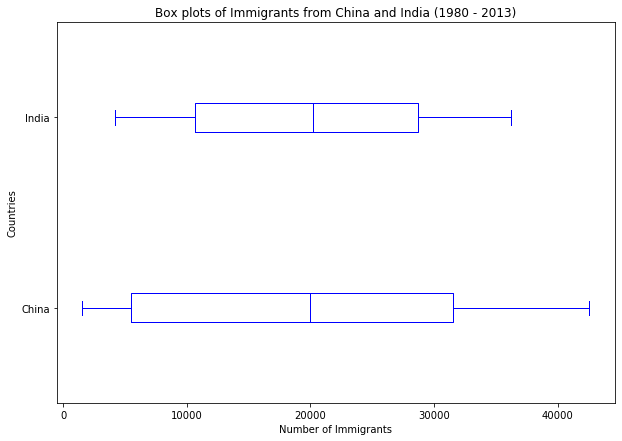

In [25]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')

plt.show()

## Subplots

> plot multiple plots within the same figure

### Perform a side by side comparison of the box plot with the line plot of China and India's immigration.

>To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. 

>With subplots, we usually work with the artist layer instead of the scripting layer.

![](../images/subplots.png)

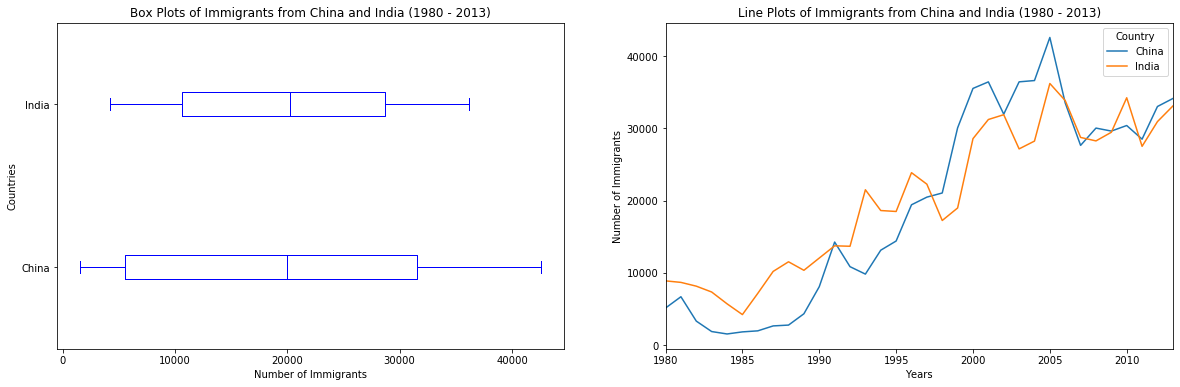

In [26]:
fig = plt.figure() # create figure

# add subplot 1 (1 row, 2 columns, first plot)
ax0 = fig.add_subplot(1, 2, 1) 

# add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

### Create a box plot to visualize top 15 countries by decades
>Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

### Step 1: Get the dataset
>Get the top 15 countries based on Total immigrant population. 

>Name the dataframe df_top15.

In [27]:
df_can.sort_values(by='Total', ascending=False, inplace=True)

df_top15 = df_can['Total'].head(15)
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [28]:
df_top15.index

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan', 'United States of America', 'Iran (Islamic Republic of)',
       'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France',
       'Jamaica', 'Viet Nam', 'Romania'],
      dtype='object', name='Country')

### Step 2: Create a new dataframe which contains the aggregate for each decade

1. Create a list of all years in decades 80's, 90's, and 00's.
2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3. Merge the three series into a new data frame. Call your dataframe new_df

In [29]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_80s[:5]

['1980', '1981', '1982', '1983', '1984']

In [30]:
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

In [41]:
# slice the original dataframe df_can to create a series for each decade
# df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_80s = df_can.loc[df_top15.index, years_80s]
df_80s

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Country,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979


In [42]:
# slice the original dataframe df_can to create a series for each decade 
# sum across all years for each country
df_80s = df_can.loc[df_top15.index, years_80s].sum(axis=1)
df_80s

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

In [43]:
df_90s = df_can.loc[df_top15.index, years_90s].sum(axis=1)
df_00s = df_can.loc[df_top15.index, years_00s].sum(axis=1)

In [44]:
# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

In [45]:
# display dataframe
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [46]:
# new_df statistics
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


### Step 3: Plot the box plots

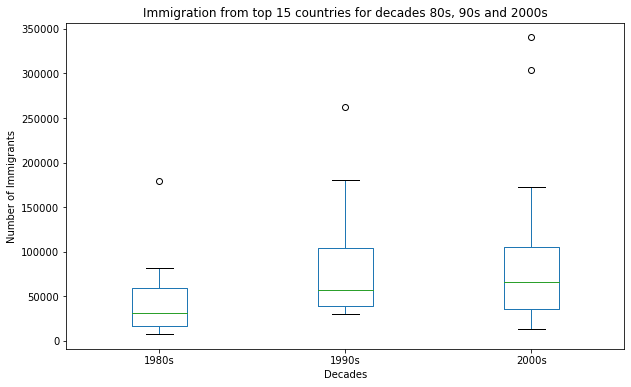

In [47]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.xlabel('Decades')
plt.ylabel('Number of Immigrants')

plt.show()

>Box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:
- larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
- smaller than Q1 by at least 1.5 times the IQR.

>Decade 2000s as an example:
- Q1 (25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

>Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.
- Outlier > 105,505.5 + (1.5 * 69,404)
- Outlier > 209,611.5

# Scatter Plots

# Bubble Plots